## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
import seaborn as sns
from scipy import stats

print('Libraries imported')

Libraries imported


## 2. Import dataset and view

In [2]:
df_day = pd.read_csv('dataset/day.csv')
df_hour = pd.read_csv('dataset/hour.csv')

In [3]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### *Comment: As we need to predict hourly utilization “cnt”, we are taking only hourly dataset for the analysis and prediction.* 

### 2.1. Check for duplicates and missing values

In [6]:
df_hour.duplicated().value_counts()

False    17379
dtype: int64

In [7]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## 3. Dataset variables and manipulation

In [9]:
print(df_hour.columns)
df_hour.describe().round(2)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379.00,17379.0,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,8690.00,2.50,0.5,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,5017.03,1.11,0.5,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,1.00,1.00,0.0,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4345.50,2.00,0.0,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,8690.00,3.00,1.0,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,13034.50,3.00,1.0,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,17379.00,4.00,1.0,12.00,23.00,1.00,6.00,1.00,4.00,1.00,1.00,1.00,0.85,367.00,886.00,977.00


In [11]:
## Check uniqueness in data
df_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

### Dataset description:
* Total no. of days: 731
* season      : 4 (1:springer, 2:summer, 3:fall, 4:winter)
* yr          : year (0: 2011, 1:2012)
* mnth        : month ( 1 to 12)
* hr          : hour (0 to 23)
* holiday     : binary (yes/no) - weather day is holiday
* weekday     : day of the week (0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri & 6:Sat)
* working day : binary (if day is neither weekend nor holiday is 1, otherwise is 0)
* weathersit  : - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp        : Normalized temperature in Celsius. The values are divided to 41 (max)
* atemp       : Normalized feeling temperature in Celsius. The values are divided to 50 (max)
* hum         : Normalized humidity. The values are divided to 100 (max)
* windspeed   : Normalized wind speed. The values are divided to 67 (max)
* casual      : count of casual users
* registered  : count of registered users
* cnt         : count of total rental bikes including both casual and registered    

#### Comment:
* *dteday is in object type that should be change in datetime*
* *casual & Registered variable is dependent on target variable cnt, which will not include in final analysis and prediction*
* *instance is just for index which will not include in final analysis and prediction*

In [12]:
## Creating a copy of data to keep original data without any changes
df = df_hour.copy()
df['dteday'] = pd.to_datetime(df['dteday'])

## 4. EDA (Exploratory data analysis)

In [13]:
## Types of data variables
df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [14]:
# bike rental on holiday
df.groupby("holiday")["cnt"].sum().reset_index()

,holiday,cnt
0,0,3214244
1,1,78435


In [15]:
# bike rental on working days
df.groupby("workingday")["cnt"].sum().reset_index()

,workingday,cnt
0,0,1000269
1,1,2292410


In [16]:
# bike rent during different humidity
df.groupby('hum')['cnt'].agg(['sum','mean','count']).reset_index().sort_values("sum", ascending = False)

,hum,sum,mean,count
74,0.83,93265,148.039683,630
46,0.55,86206,244.903409,352
37,0.46,79253,250.800633,316
57,0.66,76920,198.247423,388
53,0.62,76125,234.230769,325
...,...,...,...,...
1,0.08,77,77.000000,1
87,0.97,64,64.000000,1
5,0.14,38,19.000000,2
3,0.12,29,29.000000,1


In [17]:
## bike rental vs windspeed
df.groupby('windspeed')['cnt'].agg(['sum','mean','count']).reset_index().sort_values("sum", ascending = False)

,windspeed,sum,mean,count
0,0.0000,350203,160.643578,2180
4,0.1642,332998,196.458997,1695
5,0.1940,332407,200.607725,1657
6,0.2239,320678,211.948447,1513
3,0.1343,306423,176.307825,1738
7,0.2537,276880,213.806950,1295
2,0.1045,268821,166.246753,1617
8,0.2836,225882,215.536260,1048
1,0.0896,213804,150.037895,1425
9,0.2985,173774,215.066832,808


In [18]:
## Classification of numeric and catagorical variable

num_feature = ["temp", "atemp", "hum", "windspeed", "cnt"]
cat_feature = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]

### 4.1 distribution of variable 

In [20]:
def density_plot(dfr,num_feature):
  graph = plt.figure(figsize = (20,30))
  for i,col in enumerate(num_feature) :
    sns.set_style("ticks")
    sns.set_context("poster");
    plt.subplot(6,2,i+1);
    sns.histplot(dfr[col], color = '#055E85', kde = True, stat = "density");
    feature = dfr[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.title(f'{col.title()}');
    plt.tight_layout();

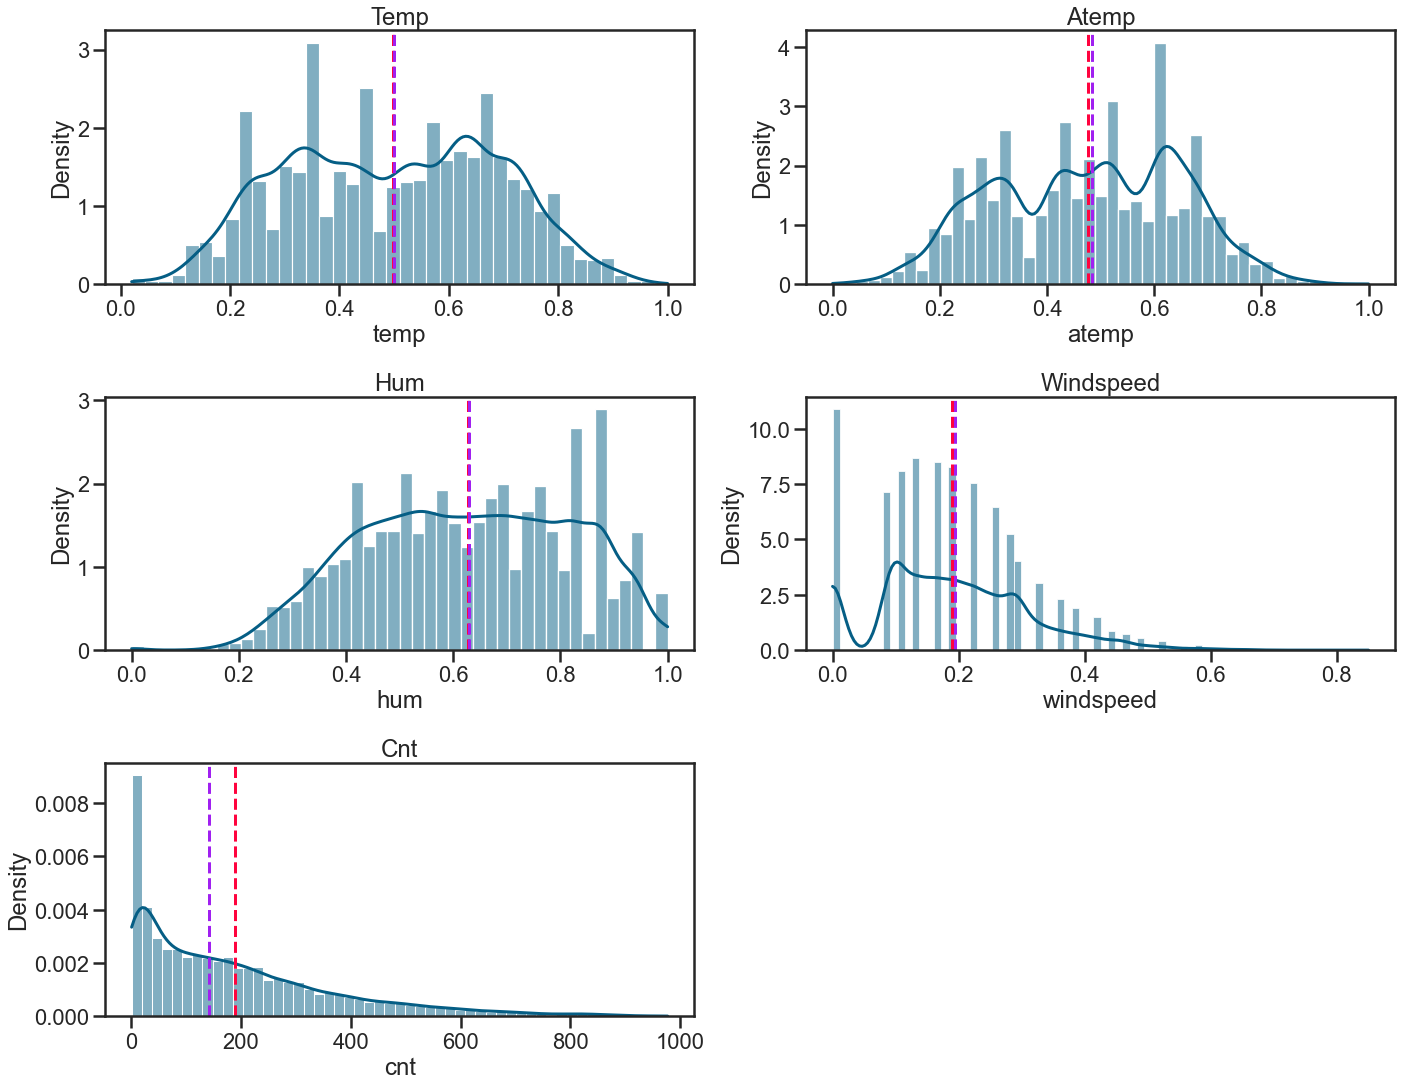

In [21]:
density_plot(df,num_feature)

#### Comments:
* *Cnt is right skewed distribution - need transformation either log, square or cube for prediction*


In [22]:
# sns.displot(df_hour['cnt'])
# sns.displot(np.log(df_hour['cnt']))
# cat_feature = ["season", "yr", "mnth", "hr", "holiday", "weekday", "weathersit"]
# ["temp", "atemp", "hum", "windspeed", "cnt"]

### 4.2 Bar Graph 

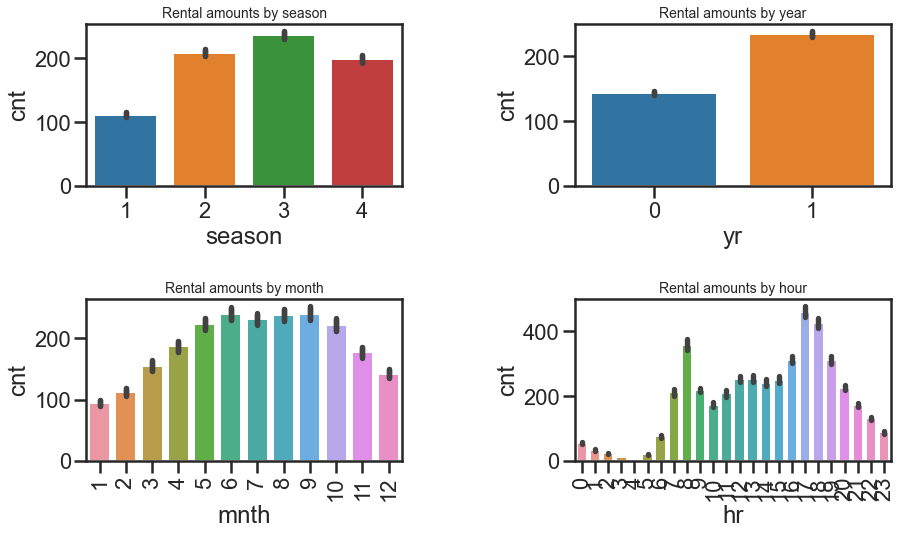

In [25]:
## Bar graph of catagorical variables
mpl.rc('font', size=12)                    
mpl.rc('axes', titlesize=14)                 
figure, axes = plt.subplots(nrows=2, ncols=2) 
plt.tight_layout()                            
figure.set_size_inches(14, 8)                

sns.barplot(x='season', y='cnt', data=df, ax=axes[0, 0])
sns.barplot(x='yr', y='cnt', data=df, ax=axes[0, 1])
sns.barplot(x='mnth', y='cnt', data=df, ax=axes[1, 0])
sns.barplot(x='hr', y='cnt', data=df, ax=axes[1, 1])

sns.barplot(x='season', y='cnt', data=df, ax=axes[0, 0])
sns.barplot(x='yr', y='cnt', data=df, ax=axes[0, 1])
sns.barplot(x='mnth', y='cnt', data=df, ax=axes[1, 0])


axes[0, 0].set(title='Rental amounts by season')
axes[0, 1].set(title='Rental amounts by year')
axes[1, 0].set(title='Rental amounts by month')
axes[1, 1].set(title='Rental amounts by hour')

axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

#### Comments:
* There were more rentals in 2012 than in 2011
* The number of rentals is highest in June and lowest in January. i.e. the warmer the weather, the higher the number of rentals.
* number of rentals per hour: 0800 and 1700-1800 highest

### 4.3 Boxplot of catagorical variables

[Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

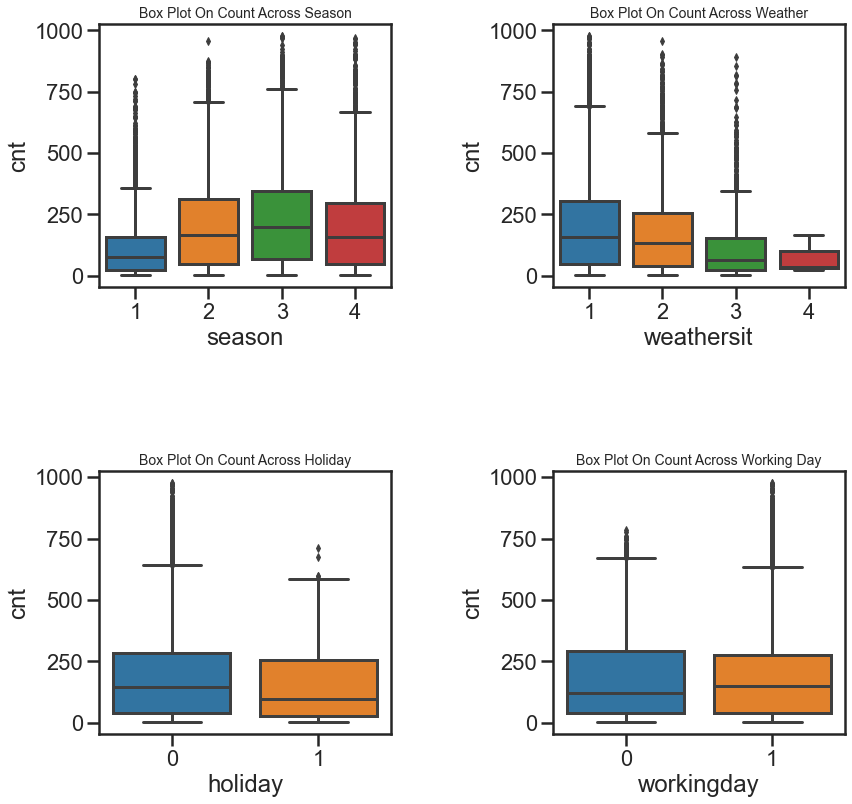

In [26]:
## Boxplot 
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(13, 13)

sns.boxplot(x='season', y='cnt', data=df, ax=axes[0, 0])
sns.boxplot(x='weathersit', y='cnt', data=df, ax=axes[0, 1])
sns.boxplot(x='holiday', y='cnt', data=df, ax=axes[1, 0])
sns.boxplot(x='workingday', y='cnt', data=df, ax=axes[1, 1])


axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')


### 4.4 Bivariant Analysis 

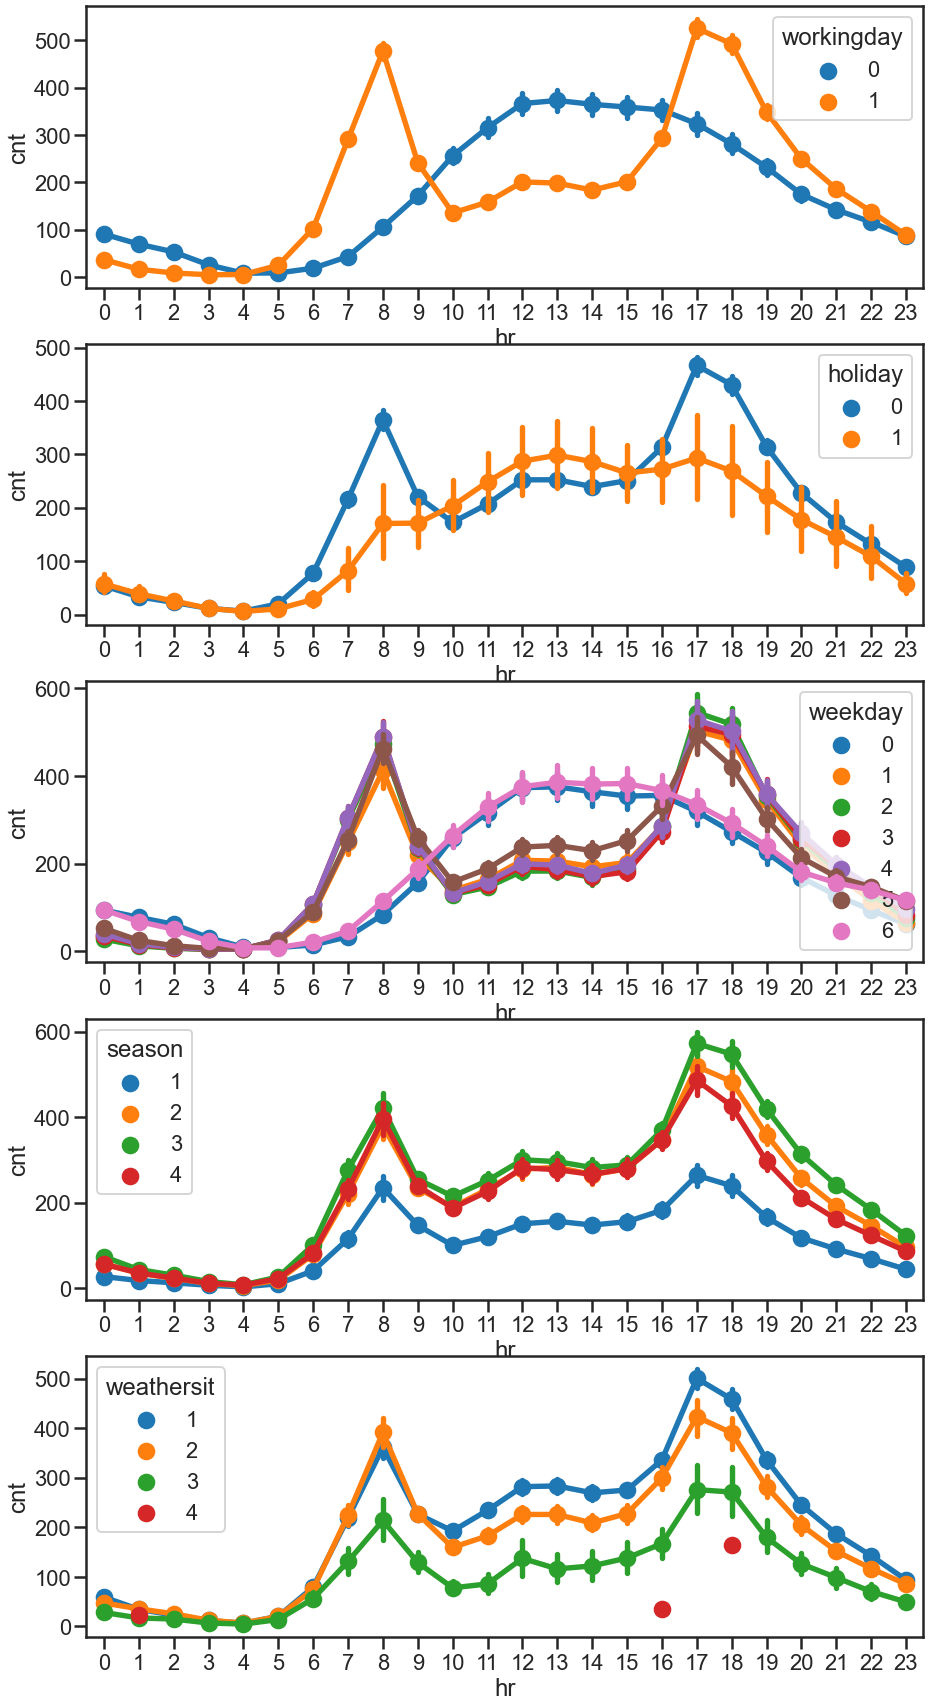

In [27]:
## Point plot
mpl.rc('font', size = 5)
figure, axes = plt. subplots(nrows = 5)
figure.set_size_inches(15, 30)

sns.pointplot(x = 'hr', y = 'cnt', data = df, hue = 'workingday', ax = axes[0])
sns.pointplot(x = 'hr', y = 'cnt', data = df, hue = 'holiday', ax = axes[1])
sns.pointplot(x = 'hr', y = 'cnt', data = df, hue = 'weekday', ax = axes[2])
sns.pointplot(x = 'hr', y = 'cnt', data = df, hue = 'season', ax = axes[3])
sns.pointplot(x = 'hr', y = 'cnt', data = df, hue = 'weathersit', ax = axes[4])
plt.savefig(r'fig1.pdf', bbox_inches='tight', dpi=300)

### 4.5 Correlation analysis:

In [28]:
## Correlation plot to check collinearity between variables

In [29]:
df.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

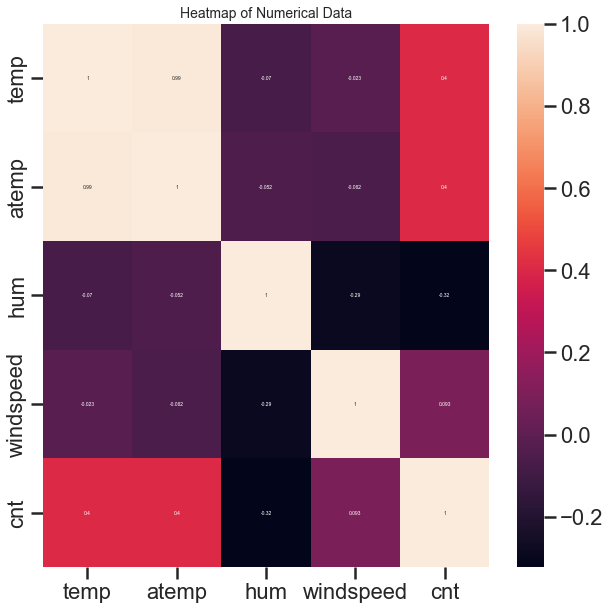

In [30]:
corrMat = df[num_feature].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot = True) # 상관관계 히트맵 그리기
ax.set(title = "Heatmap of Numerical Data")

<AxesSubplot:xlabel='hum', ylabel='cnt'>

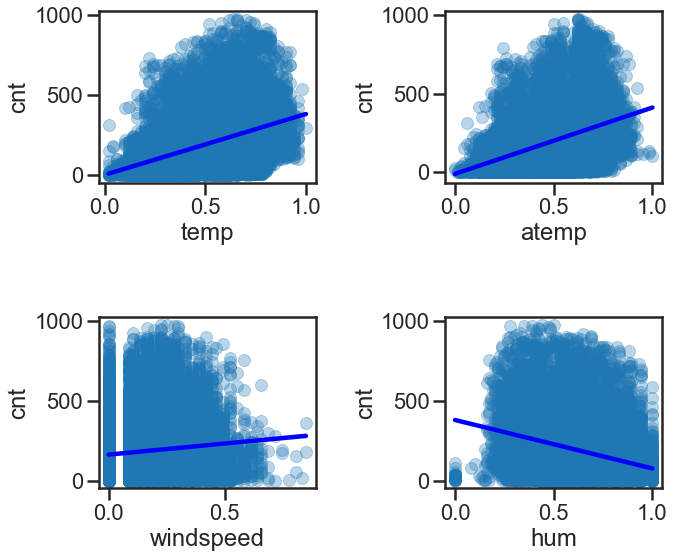

In [31]:
mpl.rc('font', size = 15)
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(10, 9)

sns.regplot(x = 'temp', y = 'cnt', data = df, ax = axes[0, 0],
           scatter_kws = {'alpha': 0.3}, line_kws = {'color': 'blue'})
sns.regplot(x = 'atemp', y = 'cnt', data = df, ax = axes[0, 1],
           scatter_kws = {'alpha': 0.3}, line_kws = {'color': 'blue'})
sns.regplot(x = 'windspeed', y = 'cnt', data = df, ax = axes[1, 0],
           scatter_kws = {'alpha': 0.3}, line_kws = {'color': 'blue'})
sns.regplot(x = 'hum', y = 'cnt', data = df, ax = axes[1, 1],
           scatter_kws = {'alpha': 0.3}, line_kws = {'color': 'blue'})

## 5. Data preprocessing and Feature ENgineering

In [32]:
# dataset has no missing and null values
# dataset has no duplicates
data = df.copy()

In [33]:
# drop not-important variable
# change categorical variables type from integer for one hot encoding
data.drop(columns = ['instant', 'dteday', 'yr', 'mnth', 'weekday', 'atemp', 'casual', 'registered'], 
                      axis = 1, inplace = True)

cols = ['season', 'holiday', 'workingday', 'weathersit']
data[cols] = data[cols].astype('category')
data = pd.get_dummies(data, drop_first = True)

### 5.1 Data Transformation

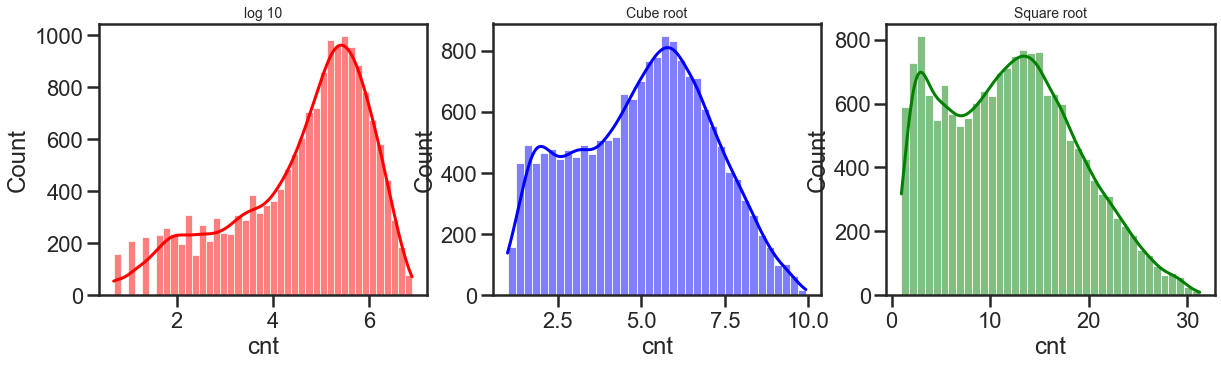

In [34]:
# Dependent variable 'cnt'
fig,axes = plt.subplots(1,3,figsize=(20,5))
# here we use log10 
sns.histplot(np.log1p(data['cnt']),ax=axes[0],color='red', kde = True).set_title("log 10"); 
# here we use cube root 
sns.histplot(np.cbrt(data['cnt']),ax=axes[1],color='blue', kde = True).set_title("Cube root");
# here we use square root 
sns.histplot(np.sqrt(data['cnt']),ax=axes[2], color='green', kde = True).set_title("Square root");

In [35]:


# applying cube root on Rented_Bike_Count
# data['cnt']=np.cbrt(data['cnt'])

*Comment: The cube root of the target variable has better distribution but for XGB Regressor the transformation doesn't help much in predictive modelling.*

### 5.2 Addition of lags in dataset

In [36]:
## For multivarient forcasting we use lags (on hours) for better results

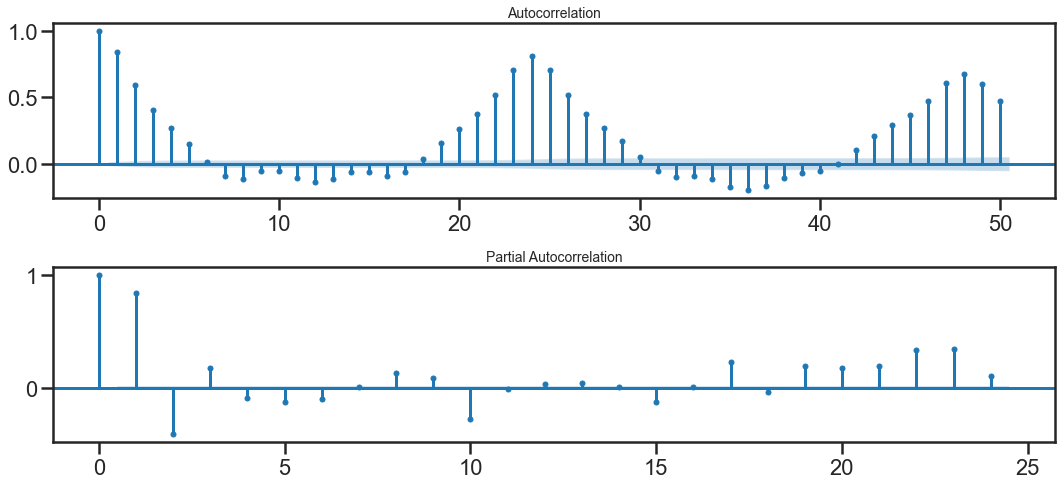

In [37]:
## Checking the coorelation of lags by acf and pacf plots
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 7))
plot_acf(data['cnt'],lags=50, ax=ax[0])
plot_pacf(data['cnt'],lags=24, ax=ax[1], method='ols')
plt.tight_layout()
plt.show()

*Comment: As it is a multivarient forecasting case, intriducing lags (t-n) makes the time series model more accurate*

In [38]:
## adding lags in dataset t-4
temp_cnt = data["cnt"]
temp_cnt_df = pd.concat([temp_cnt.shift(4), temp_cnt.shift(3), temp_cnt.shift(2), temp_cnt.shift(1)], axis = 1)
temp_cnt_df.columns = ['cnt_lag4', 'cnt_lag3', 'cnt_lag2', 'cnt_lag1']
data = pd.concat([data, temp_cnt_df], axis = 1)

In [166]:
# data = data.iloc[4:]

### 5.3 Variable Importance 

In [39]:
from xgboost import XGBRegressor 
# Embedded Method of validating the feature importances of selected features
def variable_importance(x,y):
  # Create the XGBRegressor
  model= XGBRegressor(objective='reg:squarederror')
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  return final_df

def randomforest_embedded(x,y):
  # Create the XGBRegressor
  model= XGBRegressor(objective='reg:squarederror')
  # Fit the mmodel
  model.fit(x,y)
  y_pred = model.predict(x)
  return y_pred

Text(0.5, 0, 'actual')

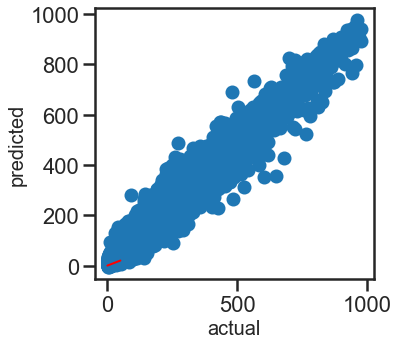

In [40]:
y_pred = randomforest_embedded(x=data.drop(["hr", "cnt"],axis=1),y=data["cnt"])
plt.figure(figsize=(5,5))

plt.scatter(data['cnt'], y_pred)
plt.plot([0, 50],
         [0, 20],
         color = 'r',
        linestyle = '-',
        linewidth = 2)

plt.ylabel('predicted', size = 20)
plt.xlabel('actual', size = 20)

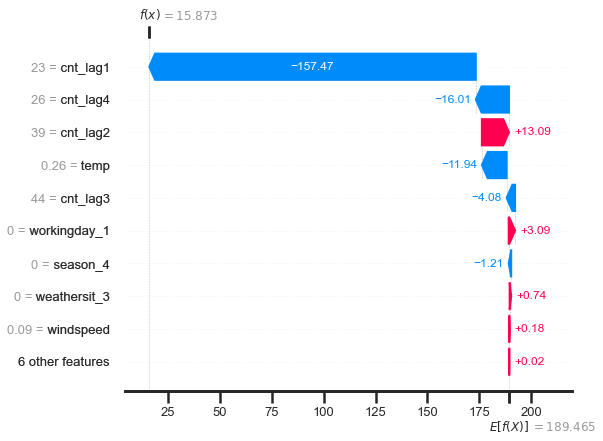

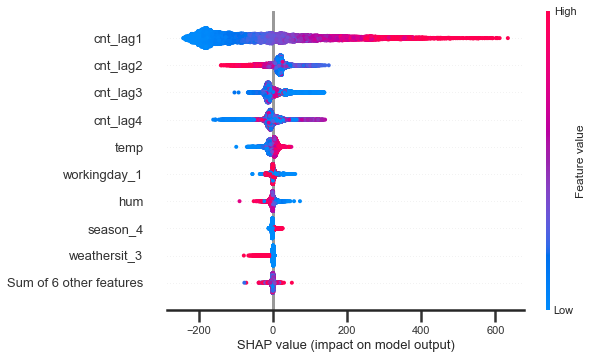

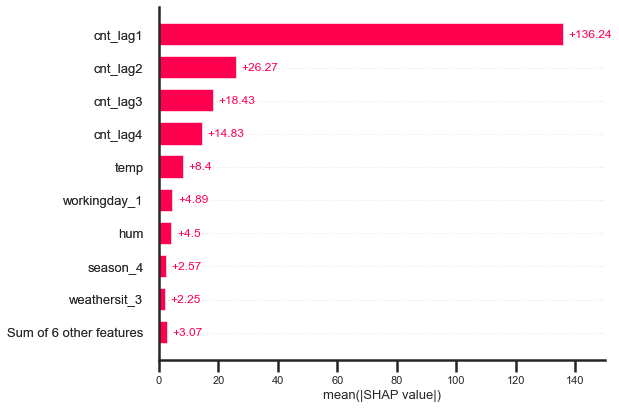

In [41]:
import shap
model= XGBRegressor(objective='reg:squarederror')
model.fit(data.drop(["hr", "cnt"],axis=1),data["cnt"])
explainer = shap.Explainer(model)
shap_values = explainer(data.drop(["hr", "cnt"],axis=1))

shap.plots.waterfall(shap_values[350])
shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

*Comment: "cnt_lag1" is driving variable for the model, due to this we can't analyse the other variable. Lets drop this variable to see the importance of other features.*

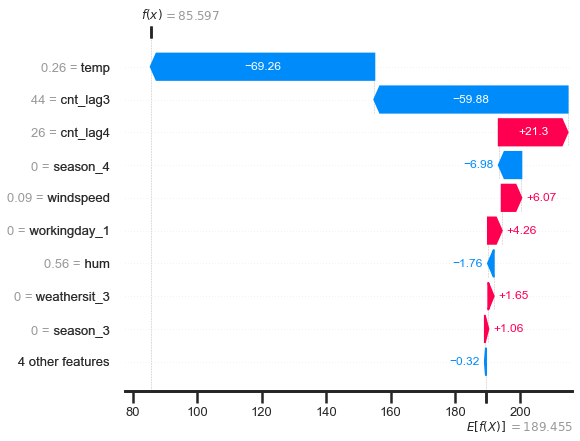

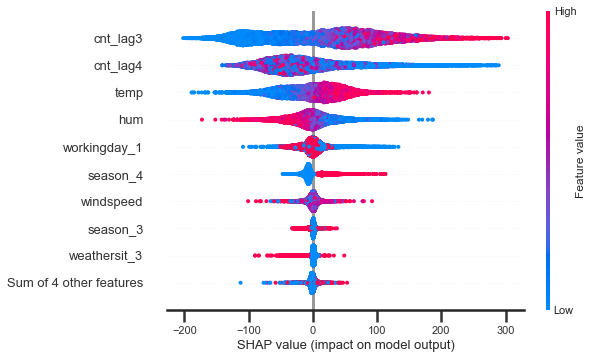

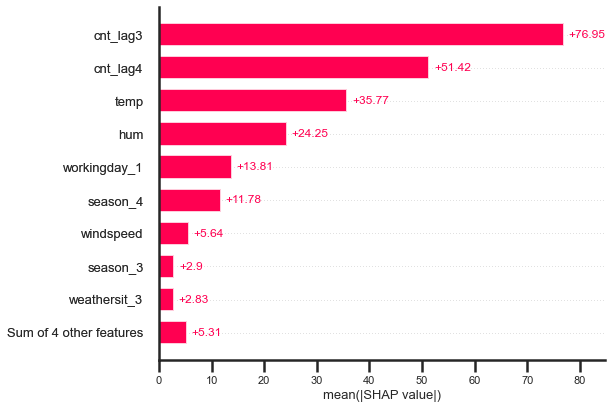

In [42]:
import shap
model= XGBRegressor(objective='reg:squarederror')
model.fit(data.drop(["hr", "cnt", "cnt_lag1", "cnt_lag2"],axis=1),data["cnt"])
explainer = shap.Explainer(model)
shap_values = explainer(data.drop(["hr", "cnt", "cnt_lag1", "cnt_lag2"],axis=1))

shap.plots.waterfall(shap_values[350])
shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

*Comment: All the 4 lags are important and driving variable, let see the variable importance by dropping all the lag variables*

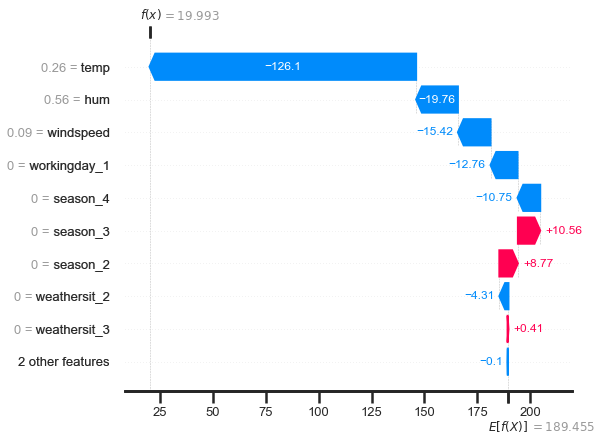

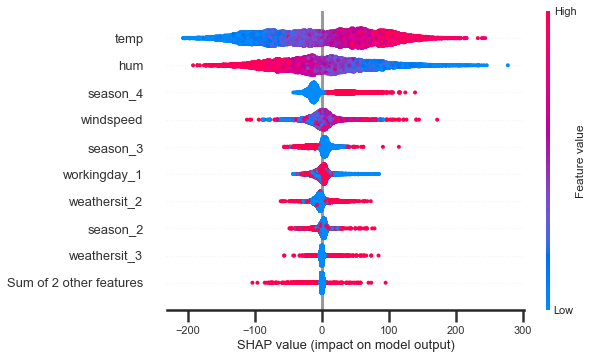

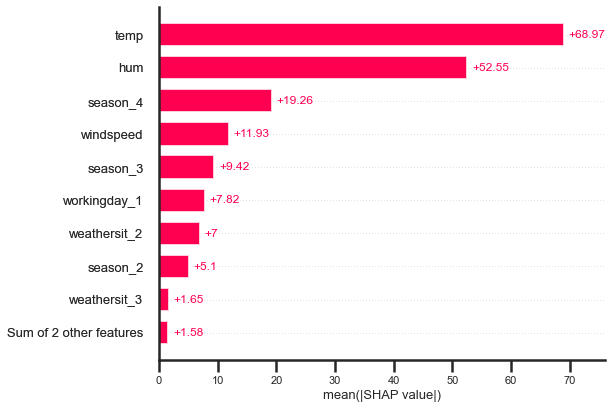

In [43]:
import shap
model= XGBRegressor(objective='reg:squarederror')
model.fit(data.drop(["hr", "cnt", "cnt_lag1", "cnt_lag2", "cnt_lag3", "cnt_lag4"],axis=1),data["cnt"])
explainer = shap.Explainer(model)
shap_values = explainer(data.drop(["hr", "cnt", "cnt_lag1", "cnt_lag2", "cnt_lag3", "cnt_lag4"],axis=1))

shap.plots.waterfall(shap_values[350])
shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

In [44]:
## Variable importance using XGB Regressor

In [45]:
## Feature importance after creating lag
pd.options.display.float_format = "{:.5f}".format
variable_importance(x=data.drop(["hr", "cnt", "cnt_lag1", "cnt_lag2", "cnt_lag3", "cnt_lag4"],axis=1),y=data["cnt"])

,Features,Importances
10,weathersit_4,0.00222
2,windspeed,0.04719
3,season_2,0.04834
9,weathersit_3,0.05390
6,holiday_1,0.05490
8,weathersit_2,0.07788
7,workingday_1,0.08443
4,season_3,0.09839
1,hum,0.17439
5,season_4,0.17480


*Conclusion on varibale importance: All the variables looks important feature for predictive modeling. 
Introducing lags makes the analysis time series and will enhance model performance.* 

## 6. Modeling and Prediction

In [174]:
# data = data.iloc[4:] ## contains NaN due to lag calculation

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

* Spliting data into training and testing set: takig last 1 month data for testing
* Training  -> Jan'11 to Nov'12
* Testing --> Dec'12
* *Note: As this is time series analysis, so we cant split data randomly.* 

In [47]:
data_temp = pd.concat([data, df["dteday"]], axis = 1)
X_train = data_temp.loc[data_temp["dteday"] < "2012-12-01"].drop(['cnt', 'dteday', 'hr'], axis = 1).iloc[4:]
y_train = data_temp['cnt'].loc[data_temp["dteday"] < "2012-12-01"].iloc[4:]
X_test = data_temp.loc[data_temp["dteday"] >= "2012-12-01"].drop(['cnt', 'dteday', 'hr'], axis = 1)
y_test = data_temp['cnt'].loc[data_temp["dteday"] >= "2012-12-01"]

In [48]:
## Model training

xg_model = XGBRegressor(objective= 'reg:squarederror')

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

y_pred_train5 = xg_models.predict(X_train)
y_pred5 = xg_models.predict(X_test)

### 6.1 Model performance on hourly basis for first 24 hrs

In [49]:
y_pred5_24 = y_pred5[:24]
y_test_24 = y_test[:24]

X_test_24 = X_test[:24]

In [50]:
# # Metric Score chart for train
r2_train5 = r2(y_train, y_pred_train5)
adj_r2_train5 = 1-(1-r2(np.square(y_train), np.square(y_pred_train5)))*(
    (X_test_24.shape[0]-1)/(X_test_24.shape[0]-X_test_24.shape[1]-1))
MSE_train5 = mse(y_train, y_pred_train5)
RMSE_train5 = np.sqrt(MSE_train5)
MAE_train5 = mae(y_train, y_pred_train5)

# Metric Score chart for test
r2_test5_24 = r2(y_test_24, y_pred5_24)
adj_r2_test5_24 = 1-(1-r2(np.square(y_test_24), np.square(y_pred5_24)))*(
    (X_test_24.shape[0]-1)/(X_test_24.shape[0]-X_test_24.shape[1]-1))
MSE_test5_24 = mse(y_test_24, y_pred5_24)
RMSE_test5_24 = np.sqrt(MSE_test5_24)
MAE_test5_24 = mae(y_test_24, y_pred5_24)

new_row = [
    {
        'Model': 'XGBRegressor_24Hrs',
        'R2_train': r2_train5,
        'R2_test': r2_test5_24, 
        'Adjusted_R2_train': adj_r2_train5,
        'Adjusted_R2_test': adj_r2_test5_24,
        'MAE_train': MAE_train5,
        'MAE_test': MAE_test5_24,
        'RMSE_train': RMSE_train5,
        'RMSE_test': RMSE_test5_24
    }
]
result = pd.DataFrame(new_row)

In [51]:
result

,Model,R2_train,R2_test,Adjusted_R2_train,Adjusted_R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
0,XGBRegressor_24Hrs,0.97346,0.95284,0.90543,0.74926,19.88636,27.88100,29.65325,35.75752


### 6.2 Model performance of first 7 days (week)

In [52]:
y_pred5_week = y_pred5[:168]
y_test_week = y_test[:168]

X_test_week = X_test[:168]

In [53]:
# # Metric Score chart for train
r2_train5 = r2(y_train, y_pred_train5)
adj_r2_train5 = 1-(1-r2(np.square(y_train), np.square(y_pred_train5)))*(
    (X_test_week.shape[0]-1)/(X_test_week.shape[0]-X_test_week.shape[1]-1))
MSE_train5 = mse(y_train, y_pred_train5)
RMSE_train5 = np.sqrt(MSE_train5)
MAE_train5 = mae(y_train, y_pred_train5)

# Metric Score chart for test
r2_test5_week = r2(y_test_week, y_pred5_week)
adj_r2_test5_week = 1-(1-r2(np.square(y_test_week), np.square(y_pred5_week)))*(
    (X_test_week.shape[0]-1)/(X_test_week.shape[0]-X_test_week.shape[1]-1))
MSE_test5_week = mse(y_test_week, y_pred5_week)
RMSE_test5_week = np.sqrt(MSE_test5_week)
MAE_test5_week = mae(y_test_week, y_pred5_week)

new_row = [
    {
        'Model': 'XGBRegressor_week',
        'R2_train': r2_train5,
        'R2_test': r2_test5_week, 
        'Adjusted_R2_train': adj_r2_train5,
        'Adjusted_R2_test': adj_r2_test5_week,
        'MAE_train': MAE_train5,
        'MAE_test': MAE_test5_week,
        'RMSE_train': RMSE_train5,
        'RMSE_test': RMSE_test5_week
    }
]
result = result.append(new_row, ignore_index=True)

In [54]:
result

,Model,R2_train,R2_test,Adjusted_R2_train,Adjusted_R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
0,XGBRegressor_24Hrs,0.97346,0.95284,0.90543,0.74926,19.88636,27.88100,29.65325,35.75752
1,XGBRegressor_week,0.97346,0.91941,0.96386,0.82229,19.88636,33.55442,29.65325,54.34670


### 6.3 Model performance of entire month for comparision with other models

In [55]:
# # Metric Score chart for train
r2_train5 = r2(y_train, y_pred_train5)
adj_r2_train5 = 1-(1-r2(np.square(y_train), np.square(y_pred_train5)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train5 = mse(y_train, y_pred_train5)
RMSE_train5 = np.sqrt(MSE_train5)
MAE_train5 = mae(y_train, y_pred_train5)

# Metric Score chart for test
r2_test5 = r2(y_test, y_pred5)
adj_r2_test5 = 1-(1-r2(np.square(y_test), np.square(y_pred5)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test5 = mse(y_test, y_pred5)
RMSE_test5 = np.sqrt(MSE_test5)
MAE_test5 = mae(y_test, y_pred5)

new_row = [
    {
        'Model': 'XGBRegressor_month',
        'R2_train': r2_train5,
        'R2_test': r2_test5, 
        'Adjusted_R2_train': adj_r2_train5,
        'Adjusted_R2_test': adj_r2_test5,
        'MAE_train': MAE_train5,
        'MAE_test': MAE_test5,
        'RMSE_train': RMSE_train5,
        'RMSE_test': RMSE_test5
    }
]
result_month = pd.DataFrame(new_row)

In [56]:
result_month

,Model,R2_train,R2_test,Adjusted_R2_train,Adjusted_R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
0,XGBRegressor_month,0.97346,0.93616,0.96643,0.87787,19.88636,26.41867,29.65325,41.63674


### 6.4 Comparision with other models 

In [57]:
# Importing various machine learning models.
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import lightgbm

In [58]:


# ML Model - 1 Implementation
rmodel = LinearRegression()
# Fit the Algorithm
rmodel.fit(X_train, y_train)
     
#score
rmodel.score(X_train, y_train)

y_pred_train = rmodel.predict(X_train)
y_pred = rmodel.predict(X_test)

# Metric Score chart for train
r2_train = r2(y_train, y_pred_train)
adj_r2_train = 1-(1-r2(np.square(y_train), np.square(y_pred_train)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_train = mse(y_train, y_pred_train)
RMSE_train = np.sqrt(MSE_train)
MAE_train = mae(y_train, y_pred_train)


# Metric Score chart for test
r2_test = r2(y_test, y_pred)
adj_r2_test = 1-(1-r2(np.square(y_test), np.square(y_pred)))*(
    (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
MSE_test = mse(y_test, y_pred)
RMSE_test = np.sqrt(MSE_test)
MAE_test = mae(y_test, y_pred)

In [59]:


new_row = {
        'Model': 'Linear_Regression_month',
        'R2_train': r2_train,
        'R2_test': r2_test, 
        'Adjusted_R2_train': adj_r2_train,
        'Adjusted_R2_test': adj_r2_test,
        'MAE_train': MAE_train,
        'MAE_test': MAE_test,
        'RMSE_train': RMSE_train,
        'RMSE_test': RMSE_test
    }
result_month = result_month.append(new_row, ignore_index=True)
     


In [60]:
result_month

,Model,R2_train,R2_test,Adjusted_R2_train,Adjusted_R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
0,XGBRegressor_month,0.97346,0.93616,0.96643,0.87787,19.88636,26.41867,29.65325,41.63674
1,Linear_Regression_month,0.78572,0.74477,0.62019,0.43699,55.64334,49.98294,84.26080,83.24949


############################# END ##########################